<a href="https://colab.research.google.com/github/bpiaple/TensorFlow-Course/blob/main/03_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [1]:
#Import Tensorflow
import tensorflow as tf

print(tf.__version__)

2.15.0


# Creating some data to work with



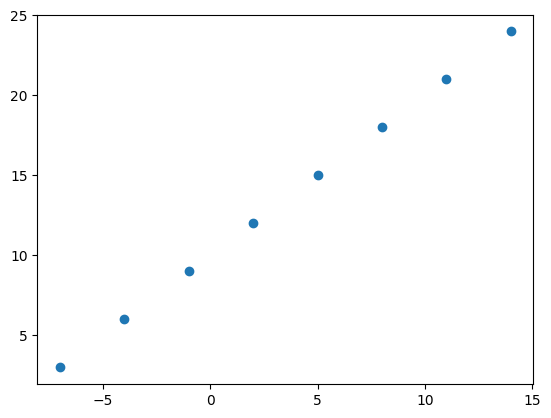

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0], dtype=np.float32)

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0], dtype=np.float32)

# Visualize it
plt.scatter(X, Y)

In [3]:
Y == X + 10


array([ True,  True,  True,  True,  True,  True,  True,  True])

# Imput and Output shapes

In [4]:
X.shape, Y.shape

((8,), (8,))

In [5]:
# Create a demo tensor for out housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_price, house_info

(<tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>)

In [6]:
# Turn our numpy arrays into tensors
X = tf.constant(X)
Y = tf.constant(Y)
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

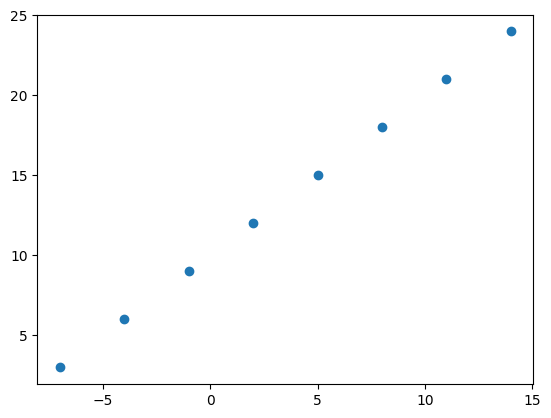

In [8]:
plt.scatter(X, Y)

## Steps in modelling with tensorflow

1. Creating a model - define the input and output layers, as well as hidden layers of a deep learning model
2. Compiling the model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. Fitting the model - letting the model to try to find patterns between X & Y (features and labels)

In [9]:
# Set the random seed
tf.random.set_seed(42)

In [10]:
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 14.3828 - mae: 14.3828
Epoch 2/5
1/1 [==============================] - 0s 20ms/step - loss: 14.0507 - mae: 14.0507
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 13.7240 - mae: 13.7240
Epoch 4/5
1/1 [==============================] - 0s 33ms/step - loss: 13.3998 - mae: 13.3998
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 13.0757 - mae: 13.0757


In [11]:
model.predict([17.0])

1/1 [==============================] - 0s 336ms/step


array([[2.2239456]], dtype=float32)

## Imporving our model

we can improve our model, by altering the steps we took to create a model

2. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hideen layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization fucntion or perhaps the **learning rate** of the optimazation function.
3. **Fitting a model** - here we might fit a mdoel for more **epochs** (leave it training for longer) or on more date (give more examples to learn from).

In [12]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.3674 - mae: 14.3674
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 14.2349 - mae: 14.2349
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 14.1024 - mae: 14.1024
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 13.9699 - mae: 13.9699
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 13.8374 - mae: 13.8374
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 13.7049 - mae: 13.7049
Epoch 7/100
1/1 [==============================] - 0s 36ms/step - loss: 13.5724 - mae: 13.5724
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 13.4399 - mae: 13.4399
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 13.3074 - mae: 13.3074
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 13.1749 - mae: 13.1749
Epoch 11/100
1/1 [==============================] -

In [13]:
# Remind ourselves of the data
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
model.predict([-7.0])

1/1 [==============================] - 0s 96ms/step


array([[-10.852679]], dtype=float32)

In [15]:
# Let's see if we can make another model to improve it

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.1795 - mae: 13.1795
Epoch 2/100
1/1 [==============================] - 0s 25ms/step - loss: 12.2994 - mae: 12.2994
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 11.3983 - mae: 11.3983
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 10.5506 - mae: 10.5506
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 9.8813 - mae: 9.8813
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 9.1940 - mae: 9.1940
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 8.4890 - mae: 8.4890
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 7.7638 - mae: 7.7638
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 7.0156 - mae: 7.0156
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 6.2432 - mae: 6.2432
Epoch 11/100
1/1 [==============================] - 0s 20ms/ste

In [16]:
model.predict([10.0])

1/1 [==============================] - 0s 110ms/step


array([[19.437933]], dtype=float32)

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               200       
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model...
```


from os import GRND_NONBLOCK
When it comes to evaluation... there are three words you should memorize:
"Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

In [18]:
 # Make a bigger dataset
X = tf.range(-100, 100, 3)
X

<tf.Tensor: shape=(67,), dtype=int32, numpy=
array([-100,  -97,  -94,  -91,  -88,  -85,  -82,  -79,  -76,  -73,  -70,
        -67,  -64,  -61,  -58,  -55,  -52,  -49,  -46,  -43,  -40,  -37,
        -34,  -31,  -28,  -25,  -22,  -19,  -16,  -13,  -10,   -7,   -4,
         -1,    2,    5,    8,   11,   14,   17,   20,   23,   26,   29,
         32,   35,   38,   41,   44,   47,   50,   53,   56,   59,   62,
         65,   68,   71,   74,   77,   80,   83,   86,   89,   92,   95,
         98], dtype=int32)>

In [19]:
y = X + 10
y

<tf.Tensor: shape=(67,), dtype=int32, numpy=
array([-90, -87, -84, -81, -78, -75, -72, -69, -66, -63, -60, -57, -54,
       -51, -48, -45, -42, -39, -36, -33, -30, -27, -24, -21, -18, -15,
       -12,  -9,  -6,  -3,   0,   3,   6,   9,  12,  15,  18,  21,  24,
        27,  30,  33,  36,  39,  42,  45,  48,  51,  54,  57,  60,  63,
        66,  69,  72,  75,  78,  81,  84,  87,  90,  93,  96,  99, 102,
       105, 108], dtype=int32)>

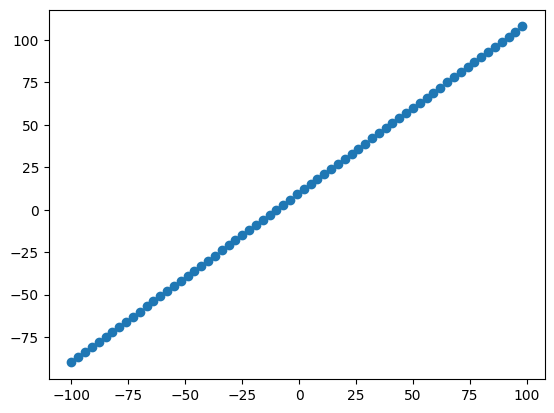

In [20]:
# plot the data
plt.scatter(X, y)

### The 3 sets of data...

* Training set - the model learns from this data, which is typically 70-80% of the total data you have available
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available
* Test set - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [21]:
# Check the length of how many samples we have
len(X)

67

In [22]:
# Split the data into train and test sets
X_train = X[:55]
y_train = y[:55]

X_test = X[55:]
y_test = y[55:]

len(X_train), len(X_test), len(y_train), len(y_test)

(55, 12, 55, 12)

### Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!

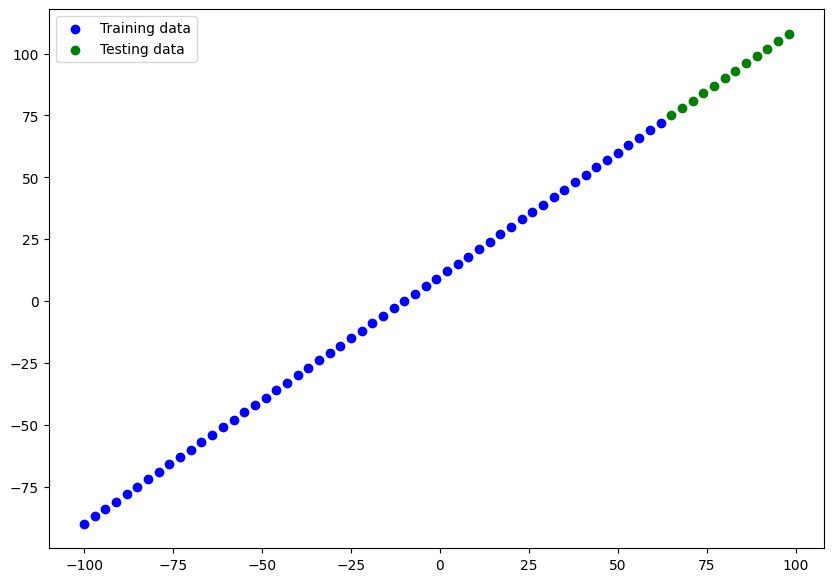

In [23]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show the legend
plt.legend()

In [24]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

# 3. Train the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 2s 14ms/step - loss: 7885.9419
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 6223.1802
Epoch 3/500
2/2 [==============================] - 0s 12ms/step - loss: 4847.1069
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 3497.0601
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 2545.0134
Epoch 6/500
2/2 [==============================] - 0s 11ms/step - loss: 1671.0841
Epoch 7/500
2/2 [==============================] - 0s 13ms/step - loss: 1075.1567
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 633.5021
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 337.8630
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 184.9626
Epoch 11/500
2/2 [==============================] - 0s 8ms/step - loss: 118.6400
Epoch 12/500
2/2 [==============================] - 0s 16ms/step - loss: 121.0396
Epoch 13/500
2/2 [====

In [25]:
model.predict([10.0])

1/1 [==============================] - 0s 274ms/step


array([[19.999989]], dtype=float32)

In [26]:
from os import name
# Let's create a model which builds automatically by defining the input_shape argument in the first layer in the model.

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu", name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name='my_model')

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mse"])

In [31]:
# 3. Fit the model (again same as above)
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [32]:
# model.summary()

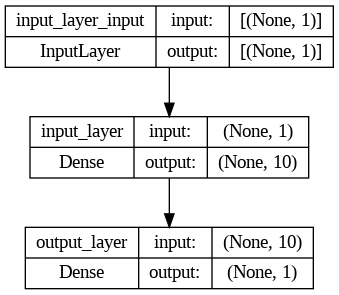

In [33]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model predictions

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [34]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 47ms/step


array([[ 75.11006 ],
       [ 78.125145],
       [ 81.14023 ],
       [ 84.15531 ],
       [ 87.170395],
       [ 90.18548 ],
       [ 93.20056 ],
       [ 96.21564 ],
       [ 99.23073 ],
       [102.24581 ],
       [105.260895],
       [108.27598 ]], dtype=float32)

In [35]:
y_test

<tf.Tensor: shape=(12,), dtype=int32, numpy=
array([ 75,  78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108],
      dtype=int32)>

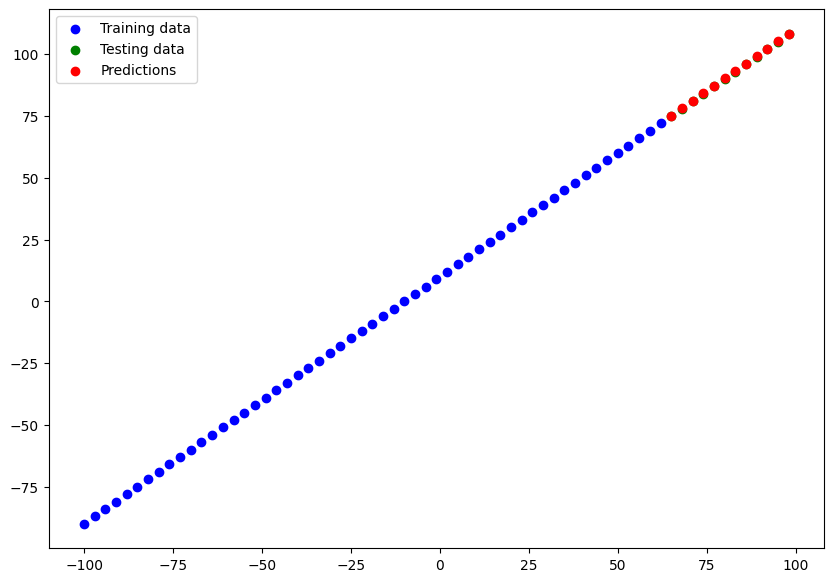

In [36]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()
  # Show the plot
  plt.show()

plot_predictions( X_train, y_train, X_test, y_test, y_pred)


### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* Mean absolute error (MAE) - the mean absolute error : the average of the absolute differences between predictions and actual values.
* Mean squared error (MSE) - the mean squared error : the average of the squared differences between predictions and actual values

In [37]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 179ms/step - loss: 0.0400 - mse: 0.0400


[0.03996751084923744, 0.03996751084923744]

In [38]:
tf.keras.losses.mae(y_test, y_pred)

<tf.Tensor: shape=(12,), dtype=float32, numpy=
array([16.408281, 13.91657 , 11.929886, 10.44823 ,  9.471601,  9.      ,
        9.033427,  9.571879, 10.615364, 12.163875, 14.217412, 16.775978],
      dtype=float32)>

# A larger example

In [42]:
# import required libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(tf.__version__)

2.15.0


In [43]:
# Read the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [45]:
# Let's try one hot encode our data
one_hot = pd.get_dummies(insurance)
one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [46]:
# Create X & y values (features and labels)
X = one_hot.drop("charges", axis=1)
y = one_hot["charges"]

In [99]:
# Create train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# Build a neural network
tf.random.set_seed(42)

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Create a model
model_1_large_example = Sequential([
  Dense(100, activation="relu"),
  Dense(100, activation="relu"),
  Dense(64, activation="relu"),
  Dense(1)
])

In [105]:
# 2. Compile the model
model_1_large_example.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

In [103]:
X_train = tf.constant(X_train, dtype=tf.float32)
y_train = tf.constant(y_train)

In [108]:
# 3. Fit the model
history = model_1_large_example.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 8280.8457 - mae: 8280.8457
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 8280.8672 - mae: 8280.8672
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 8280.8672 - mae: 8280.8672
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 8280.8623 - mae: 8280.8623
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 8280.8604 - mae: 8280.8604
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 8280.8691 - mae: 8280.8691
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8280.8418 - mae: 8280.8418
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 8280.8418 - mae: 8280.8418
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 8280.8418 - mae: 8280.8418
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 8280.8438 - mae: 8280.8438

In [83]:
# Convert test data to tensor

X_test = tf.constant(X_test, dtype=tf.float32)
y_test = tf.constant(y_test)

In [84]:
# Evaluate the model on the test set
model_1_large_example.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 5796.9907 - mae: 5796.9907


[5796.99072265625, 5796.99072265625]

## Let's Build another model

In [109]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
# Build a neural network
tf.random.set_seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Create a model
model_2_large_example = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10),

  tf.keras.layers.Dense(1)
])

In [144]:
model_2_large_example.compile(loss='mae',
              optimizer='adam',
              metrics=["mae"])

In [145]:
# Convert train data to tensor
X_train = tf.constant(X_train, dtype=tf.float32)
y_train = tf.constant(y_train)

history = model_2_large_example.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13336.0332 - mae: 13336.0371
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13271.4482 - mae: 13271.4482
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13036.2725 - mae: 13036.2725
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12587.0752 - mae: 12587.0723
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 12272.9863 - mae: 12272.9854
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 12194.7500 - mae: 12194.7510
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12138.6094 - mae: 12138.6074
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12068.7314 - mae: 12068.7305
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 11984.3809 - mae: 11984.3809
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11862.70

Text(0.5, 0, 'epochs')

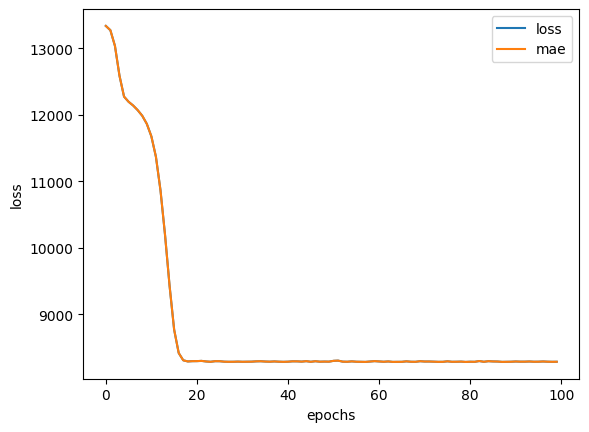

In [146]:
# Plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data for machine learning

In [155]:
# Read the insurance dataset

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [161]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split


# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and one hot encoding (OneHotEncoder)
X_train_normalized = ct.transform(X_train)
X_test_normalized = ct.transform(X_test)

In [164]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [165]:
X_test_normalized[0]

array([0.58695652, 0.24791499, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [208]:
# Build a neural network model

tf.random.set_seed(42)

# 1. Create a model
model_3_large_example = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)

])

In [209]:
# Compile the model
model_3_large_example.compile(loss='mae',
              optimizer='adam',
              metrics=["mae"])

In [212]:
# Fit the model
model_3_large_example.fit(X_train_normalized, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 4ms/step - loss: 1899.6155 - mae: 1899.6155
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 1895.2615 - mae: 1895.2615
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 1898.8374 - mae: 1898.8374
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 1905.5166 - mae: 1905.5166
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 1902.1301 - mae: 1902.1301
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 1889.3927 - mae: 1889.3927
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 1900.0771 - mae: 1900.0771
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 1895.9375 - mae: 1895.9375
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 1899.6997 - mae: 1899.6997
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 1893.2423 - mae: 1893.2423

In [181]:
model_3_large_example.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 11, 100)           200       
                                                                 
 dense_72 (Dense)            (None, 11, 10)            1010      
                                                                 
 dense_73 (Dense)            (None, 11, 1)             11        
                                                                 
Total params: 1221 (4.77 KB)
Trainable params: 1221 (4.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [202]:
model_3_large_example.evaluate(X_test_normalized, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1792.3881 - mae: 1792.3881


[1792.3880615234375, 1792.3880615234375]